### Nota para correr los cuadernos. Hay que correr primero DataExplorationBusinessContext.ipynb porque ahí se exporta la variable data que es el dataframe procesado y es input de los demás cuadernos donde están los modelos.

### Este cuaderno explica los detalles más técnicos del preprocesamiento y los modelos utilizados para el caso SaludAlpes.

# Laboratorio 1 - Clasificación

## Integrantes

Natalia Sanabria Forero - 201532265

Jorge Esguerra - 201719920

Christian Forigua - 201713023

## Nivel de calidad de los datos y tareas de transformación
Gracias a un análisis exploratorio inicial se pudo determinar la calidad de los datos. Se determinó que un regsitro tenía valores nulos. Así mismo, comparando con el diccionario proporcinado, se encontraron 5 y 35 registros con valores inválidos para las variables de glucosa y presión sanguínea respectivamente. Adicionalmente, para la variable de edad se encontró que 2 registros tenían valores inválidos. 
Adicionalmente, en la exploración se encontraron 2 variables categóricas: "Hair Color" y "City". Para poder trabajar con modelos como KNN, árboles de decisión y redes nuronales es necesario transformar estas variables categóricas a valores que puedan ser procesados por los modelos. Los modelos interpretan valores númericos, por lo que las variables que están en texto natural deben ser transformadas a un dominio diferente. Por ejemplo, los valores de "Red", "Black" y "Blue", de la variable "Hair Color", pueden ser transformados a 0,1 y 2 respectivamente. Sin embargo, dado el contexto clínico del problema, consideramos que la variable de "Hair Color" no es un indicador válido para el diagnósitco de la díabetes, por lo que está varibale no fue tomada en cuenta para el entrenamiento de los modelos. De manera similar, la varibale "City" solo contaba con un único valor ("New York"). Consideramos que esta información no aporta para el entrenamiento del modelo y por esto, tampoco será tomada en cuenta. 

## Preprocesamiento de los datos
El preprocesamiento de los datos fue igual para todos los datos en términos de imputación de los datos y remoción de valores no existentes o NaN. 
Una vez finalizado el preprocesamiento, al modelo de KNN se le aplicó estandarización de datos. Al modelo MLP se le aplicó tanto normalización mediante la técnica max-min, como estandarización. El desempeño fue superior aplicando la normalización de los datos.
Las diferencias se señalan a continuación.

## Modelos

### KNN (Natalia Sanabria)

El modelo de `KNN` o `K-vecinos` es un modelo que utiliza el conjunto de datos existente para categorizar nuevos datos utilizando la distancia entre los datos más cercanos en las diferentes categorías. Es un algoritmo simple, pero requiere de muchos recursos, tanto de memoria, como de cpu para obtener los resultados y no puede desvincularse de los datos de entrenamiento, pues los utiliza cada vez que debe hacer una predicción. El procedimiento que utiliza para hacer cada predicción puede resumirse en los siguientes pasos:

1. Elegir un número de `k` y una métrica de distancia (por default el algoritmo utiliza distancia de Minkowski).
2. Encontrar los `k-vecinos más cercanos` al dato que queremos clasificar
3. Asignar la clase por voto mayoritario, es decir, darle la clase a la que pertenezcan el mayor número de vecinos.

Dado que utiliza una función de las distancias entre datos para clasificar, es prioritario que todos los valores a evaluar estén normalizados o estandarizados, de modo tal que las distancias se puedan evaluar sin que las diferentes escalas impacten el modelo y se logre un funcionamiento óptimo. En este modelo se utilizó estandarización para mantener mejor los rangos y diferencias entre rangos de los datos, de modo que las distancias sean más precisas.

A continuación se crea el modelo y se le entrega un fragmento de los datos para que los utilice para aprender. Se usa la librería ```train_test_split``` para dividir el conjunto de datos de ```X_train_std``` y ```y_train``` en dos secciones, una de datos de entrenamiento y otra de datos de prueba. Se define una muestra de pruebas de la tercera parte del tamaño de la muestra de entrenamiento, que es uno de los valores usuales de particiones que se pueden usar.

Finalmente, se itera sobre el modelo usando diferentes valores de `k_neighbors` entre 1 y 15, para definir el mejor valor del parámetro. Se encuentra que con los datos utilizados, el mejor desempeño corresponde a un parámetro `k = 9` que obtiene un rendimiento del `78.26%`, como se observa en la imagen a continuación.


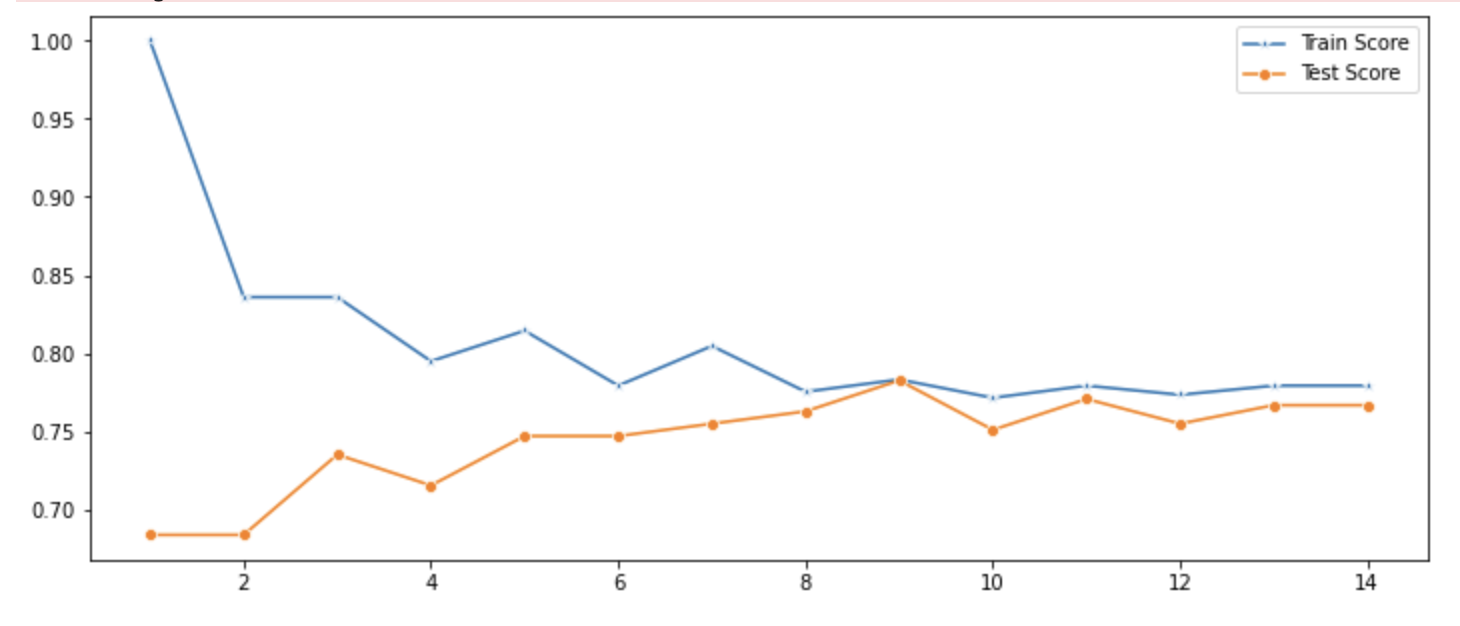

### Redes neuronales (MLP) (Cristhian Forigua)

Para el modelo de MLP es necesario realizar una transformación de los datos. El modelo de MLP es sensible a la escala pues, como intenta representar un modelo no lineal, las variables que tengan una mayor escala van a sesgar la predicción del modelo. Por lo anterior, es necesario realizar un preprocesamiento de los datos y dejarlos en una misma escala para que todas las variables influencien al modelo equitativamente. Se decidió normalizar los datos y dejar las variables en un rango entre 0 y 1. 

El modelo de MLP tiene múltiples hiperparámetros que se pueden variar para construir el clasificador. Sin embargo, únicamente nos concentramos en parámetros que alteren la arquitectura de la red y el esquema de entrenamiento en pro de alcanzar el mejor resultado posible. Para modificar la arquitectura se propone variar las capas ocultas de la red y la función de activación. Por otra parte, para variar el esquema de entrenamiento, se propone variar el método de optimización de los parámetros de la red.

Para la metodología de entrenamiento se probó Stochastic Gradient Descent (SGD) y Adam. Sin embargo, para los experimentos de las capas ocultas se seleccionó Adam. Tanto SGD como Adam soportan entrenamiento por batches, lo cual agiliza la convergencia del entrenamiento y generaliza la actualización de los pesos. Sin embargo, Adam ajusta automaticamente la tasa de aprendizaje, la cual determina la escala con la que serán actualizados los parámetros. El ajuste de la tasa de aprendizaje permite que el entrenamiento se ajuste con el paso del tiempo. A medida que el modelo se acerca a la convergencia los cambios deben ser más pequeños para seguir minimizando la función de perdida. Por lo anterior, se seleccionó Adam como optimizador.
El número de iteraciones determina cuantas veces se van a a actualizar los pesos de la red. Idealmente, tiene que ser un número lo suficientemente grande que permita al modelo llegar a la convergencia. Por lo anterior, se dicidió iterar el modelo 30.000 veces como máximo.
Así mismo, se decidió utilizar la función de activación ReLU ya que es ampliamente usada en modelos de clasificación. Se probó con todas las funciones de activación proporcionadas por sklearn (‘identity’, ‘logistic’, ‘tanh’, ‘relu’). Sin embargo, la que dio un mejor resultado fue "relu". Lo anterior puede deberse a que con está función, el modelo se ajusta mejor a los datos de entrada.
La tasa de aprendizaje determina la maginutd del cambio en los pesos. A pesar de que Adam ajusta dicho valor, es necesario establecer una tasa de aprendizaje inicial. Se decidió utilizar una tasa de 0.001 que es lo comunmente usado en modelos de aprendizaje profundo.

Finalmente, se cambió la arquitectura de la red nueronal. Se probaron arquitecturas con 1, 3 y 5 capas ocultas variando el número de neuronas entre 5 y 51 con un paso de 1. El mejor modelo se obtuvo con una arquitectura de 3 capas neuronales, con 31,62 y 31 neuronas respectivamente. Este modelo tuvo una cobertura del **0.825**. Una estructrua muy compleja puede llevar a un sobreajuste de los datos teniendo en cuenta la cantidad disponible para entrenamiento. Por otra parte, un modelo muy simple no representaría de manera adecuada el contexto del problema y tendría un bajo poder de generalización. Esto explica porque una estructura de 3 capas neuronales da el mejor resultado pues, según los datos disponibles, no es lo suficientemente compleja para sufrir de sobreajuste ni lo suficientemente sencilla para tener poco poder de generalización.
Una cobertura de 0.825 indica que más del 80% de los casos de diabetes fueron detectados. Esto es útil para el negocio ya que se busca un clasificador que detecté la mayor cantidad de casos posible pues, dentro del contexto médico, es mucho peor no detectar un paciente con diabetes, a detectar un paciente como diabético cuando este realmente no lo es. El resultado obtenido por el MLP tiene una alta cobertura, por lo que podría ser de útilidad para SaludAlpes.

### Árbol de decisión (Jorge Esguerra)

### Explicación del módelo de Árbol de Decisión

### Conceptos:
Se asume que el lector está familiarizado con la estructura de datos de árbol binario.

Raíz: Nodo principal del árbol, simboliza la regla de decisión del primer split que se hará sobre el conjunto de datos inicial. Cobija todos los datos.
Nodo: Nodo del árbol que simboliza una regla de decisión a partir de la cual se seguirá haciendo split del subconjunto de datos del nodo.
Hoja: Nodo del árbol que no representa un split a realizar, sino simplemente un grupo de elementos que quedaron clasificados bajo un conjunto de reglas de decisión. 
Pureza: Propiedad de un grupo de datos, entre más homogeneo sea, será más puro. A mayor heterogeneidad, mayor impureza en el grupo de datos. 
Information Gain o ganancia de información (IG): es una propiedad estadística que mide qué tan bien un atributo dado separa los ejemplos de entrenamiento de acuerdo con sus clasificación objetivo. 

El Árbol de decisión es un algoritmo greedy que descubre reglas condicionales para aplicar sobre un conjunto de datos, buscando maximizar la pureza de las hojas. 

Inicialmente, todos los datos están agrupados en un mismo conjunto. El algoritmo intenta determinar cual será la regla de decisión sobre todos los features (la columna o atributo) que maximizará la ganancia de información (Information Gain).

Para el modelo de árbol de decisión es irrelevante la escala de los atributos numéricos que procesa. Dado que el clasificador de árbol de decisión (una vez entrenado) es completamente equivalente a una sucesión de condicionales encadenados (if, elif, else) en los lenguajes de programación tradicionales, se sabe de antemano que los condicionales pueden ser expresados matemáticamente sin que la distancia entre los registros de un mismo atributo de los datos afecte su sentido semántico. 

Por lo anterior, no se aplicó normalización ni estandarización sobre la data que fue usada en la elaboración y pruebas del Árbol de decisión. 

### Formas de calcular la ganancia de información

La ganancia de información es un concepto que depende, en el caso de esta implementación de árboles de decisión, de dos conceptos exclusivamente. 

#### Gini
Por defecto, es el método o criterio que utiliza el DecisionTreeClassifier para maximizar la ganancia de información en el momento de escoger cuál atributo y cual umbral o regla va a aplicar sobre dicho atributo para separar un conjunto impuro de datos, buscando aumentar su pureza.

El gini de un conjunto de datos se calcula como:  

<img src="images/gini.png" width = 900/>
Imagen tomada de: https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

#### Entropía:
Es el ótro criterio que se puede utilizar en el DecisionTreeClassifier para el paso del algoritmo en donde se busca maximizar la ganancia de información.
Su fórmula es:  

<img src="images/Entropia.png" width = 900/>
Imagen tomada de: https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575


Hay que mencionar que la idea tanto del gini como de la entropía como criterios que se usan en el algoritmo, es que un nodo será splitted (separado) por el clasificador siempre y cuando sea posible cumplir con la siguiente condición:

#### Condición: Un nodo impuro será splitteado siempre que se pueda conseguir que la suma de la entropia/gini de sus dos nodos hijos sea menor a la del nodo padre. 

Esto tiene sentido, dado que lo que queremos es obtener conjuntos puros de datos a partir de reglas de decisión. Con la anterior condición, surge una nueva necesidad. Una de las debilidades del árbol de decisión es que tiende a hacer sobreajuste (overfit) de los datos. De hecho, si dejaramos correr el mismo modelo presentado en este cuaderno sin un parámetro de max_depth, el árbol que propondría el modelo sería completamente ilegible y tendría una profundidad mayor a 10. (No se pone en el cuaderno porque no viene al caso, pero se puede probar quitando el parámetro de max_depth). 

El problema de dejar un árbol de decisión con profundidades altísimas es que generará reglas de decisión demasiado específicas para el conjunto de datos en el que fue entrenado, generando sobreajuste. Esto causará que su rendimiento en datos no conocidos sea pésimo. 

Por esta razón, es importante aplicar un hiperparámetro de max_depth al árbol de decisión que se ajuste a las necesidades del problema y no nos genere sobreajuste. 

#### Información adicional del clasificador:

##### Ventajas:
Es un clasificador fácil de entender. Una ventaja de este modelo es que, dado que podemos forzarlo a que tenga una profundidad máxima, podemos siempre realizar un dibujo del árbol de decisión después de haber sido entrenado. Esto es crucial para que los negocios puedan comprender las razones detrás de las predicciones sobre nuevos datos. 

Es un clasificador sencillo de implementar, y el ajuste de los hiperparámetros es intuitivo. No requiere mayor conocimiento de prerequisito además de tener noción de la estructura de datos de árbol binario.

##### Desventajas: 
Puede generar sobreajuste fácilmente si no se tiene cuidado con el hiperparámetro max_depth.

Nota: La implementación por defecto (es decir, cuando no se especifica el parámetro criterion en el constructor de DecisionTreeClassifier) del árbol de decisión de scikit learn utiliza el criterio de gini por defecto. Esto se debe a que la entropía es más costosa de calcular, ya que la complejidad temporal de la operación de logaritmo no es tiempo constante, mientras que la resta sí.

### Redes neuronales (MLP) (Cristhian Forigua)
#### Estructura básica
Los perceptrones multicapa son modelos de aprendizaje supervisados que modelan una función f que mapea desde un espacio de representación de dimensión m hacía un espacio de salida de dimensión o (f(⦁)R^m→R^o). Dado un vector de representación X=[x_1,x_2,…,x_m] y una salida Y, el MLP puede aprender una función no lineal para mapear X→Y y así solucionar problemas de clasificación.

La estructura principal del MLP consiste en una capa de entrada, con una dimensión m, una serie de capas ocultas no lineales y una capa de salida. Esto se puede observar a continuación:

<img src="images/MLP.png" width="300" align="center"/>

Se puede observar que la capa de entrada se compone de n neuronas que representan los valores del vector de entrada. Por otra parte, cada neurona de las capas ocultas se calcula como una suma ponderada de las neuronas de la capa anterior w_1 x_1+w_2 x_2+⋯w_n x_n, donde w_i son los pesos de los valores de las neuronas de las capas anteriores, seguido de una función de activación no lineal. La capa de salida toma los valores de la última capa oculta y genera una respuesta.
El MLP tiene unos parámetros que necesitan ser estimados para ajustar el modelo a los datos. Estos parámetros vendrían siendo los pesos de las conexiones de cada neurona. Para la estimación de los parámetros, el MLP utiliza la retropropagación para optimizar los pesos. Para esto, calcula una función de pérdida según las predicciones del modelo y las anotaciones de la base de datos. Posteriormente, utiliza el gradiente de dicha función de perdida para actualizar los parámetros del modelo, y así minimizar la función de perdida. Este proceso se realiza de manera iterativa hasta que se llega a una convergencia en el problema de optimización.
##### Función de perdida
Como se mencionó anteriormente, el método de optimización funciona utilizando los gradientes de la función de perdida para actualizar los pesos de la red. Por lo anterior, es importante definir el concepto de función de perdida. Esta es una función que se encarga de medir el error entre las predicciones de la red y las anotaciones para un conjunto de datos. El MLPClassifier de sklearn solo soporta Cross_Entropy_Loss como función de perdida. 
Antes de proceder, es necesario aclarar que se tiene un problema de clasificación binario (Diagnóstico positivo o negativo). Por lo anterior, la red considerará como positivo a cualquier entrada que en la capa de salida de como resultado un valor igual o superior a 0,5. De lo contrario, se considerará un ejemplo negativo.  Ahora bien, dado que es un problema binario, el Cross_Entropy_Loss para un problema binario se define como:

<img src="images/CEL.PNG" width="600" align="center"/>

En donde y es la anotación, y gorro es la predicción del modelo y $W$ son los parámetros de la red. El término ||W||_{2}^{2} es un L_2 que penaliza los modelos complejos.

#### Optimización
El MLP empieza con parámetros aleatorios. A medida que transcurre el entrenamiento, el MLP minimiza la función de perdida actualizando los parámetros durante varias iteraciones. Una vez se calcula el error, este se retropropaga desde la capa de salida hacía todas las capas anteriores de la red. Esto permite que cada parámeto se actualice en pro de disminuir el error. 
Para la retropropagación primero se calcula el gradiente del error con respecto a los pesos $W$ del modelo y se utiliza para actualizar los pesos de la capa anterior, tal y como se muestra a continuación:

<img src="images/retro.PNG" width="400" align="center"/>

En donde *Loss* es el valor de la función de pérdida y *n* es la tasa de aprendizaje.

#### Tasa de aprendizaje
La tasa de aprendizaje es la magnitud de la actualización, en base al gradiente, para cada peso de la red. Esta determina que tan fuerte van a cambiar los pesos de la red con iteración de la retropropagación.
#### Ventajas
El MLP es capaz de aprender modelos no lineales gracias a la función de activación. Se puede ajustar a datos que no puedan ser explicados a través de modelos lineales.

#### Desventajas
El MLP es sensible a la inicialización. Por la inicialización de los pesos y la optimización, existen varios mínimos locales. Por lo anterior, una inicialización diferente puede llevar a un resultado diferente en el conjunto de test.

El MLP tiene múltiples hiperparámetros que deben ser seleccionados por el usuario.

El MLP es sensible a la escala los vectores de entrada.

### Contexto de negocio
#### ¿Cómo determinar el mejor modelo?

Para el caso actual, probaremos 3 modelos diferentes: MLP (Red neuronal), Árbol de decisión, y KNN.

Ahora bien, el problema de negocio a tratar es la predicción de diabetes en pacientes, dado un conjunto de parámetros. 

En este caso, la gravedad de las predicciones incorrectas no tiene el mismo impacto para el negocio.
Un falso positivo para este campo de estudio es un caso que el modelo predice como diabético pero en realidad no lo es. 
Un falso negativo es un caso que el modelo predice como sano, pero en realidad es diabético. 

Podemos afirmar que un falso positivo es un resultado menos perjudicial que un falso negativo, dado que si a un paciente enfermo de diabetes se le informa que está sano, corre grandes riesgos de salud. En cambio, un falso positivo podrá descartarse sin poner en riesgo su salud, simplemente mediante la realización de otro examen clínico para reforzar el diagnóstico.

Con ello en mente, las métrica de desempeño que utilizaremos para escoger el mejor modelo, teniendo en cuenta el contexto de negocio, es el recall.

Para justificar la decisión, debemos comprender la definición de recall, precisión, y f1_score. 

## Definiciones

Una matriz de confusión es una herramienta que permite visualizar el desempeño de un algoritmo de aprendizaje supervisado. En palabras simples, permite ver qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

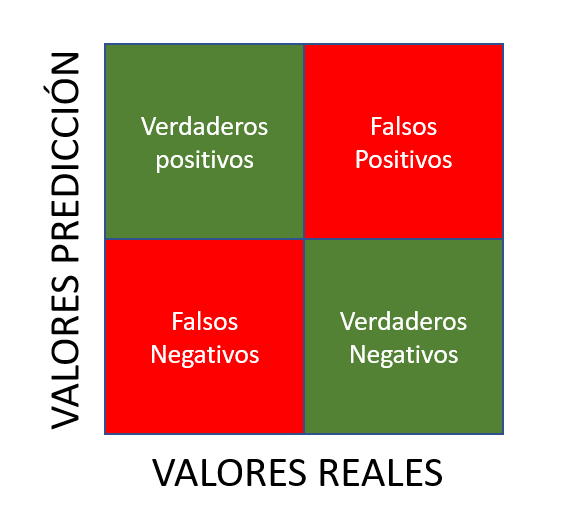

A partir de la matriz de confusión se pueden sacar 4 métricas: la exactitud, precisión, sensibilidad y especificidad.

La **exactitud** es el número de resultados bien clasificados sobre el total de resultados, es decir:

$$\frac{VP+VN}{VP+FP+FN+VN}$$

La **precisión** es el porcentaje de casos positivos detectados y se calcula como

$$\frac{VP}{VP+FP}$$

El **recall, sensibilidad o exhaustividad** es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo. Y se calcula como

$$\frac{VP}{VP+FN}$$

Finalmente, la **especificidad o f1_score** es una medida que incorpora tanto precisión como el recall, y se calcula de la siguiente forma:

$$\frac{VN}{VN+FP}$$

## Comparación de los modelos

A continuación, se puede observar una tabla que contiene el rendimiento de los 3 modelos en términos de la cobertura.

| Modelo | Recall |
| --- | --- |
| KNN | 78.26% |
| Árbol de decisión| 69.8% |
| MLP|82.5 %|